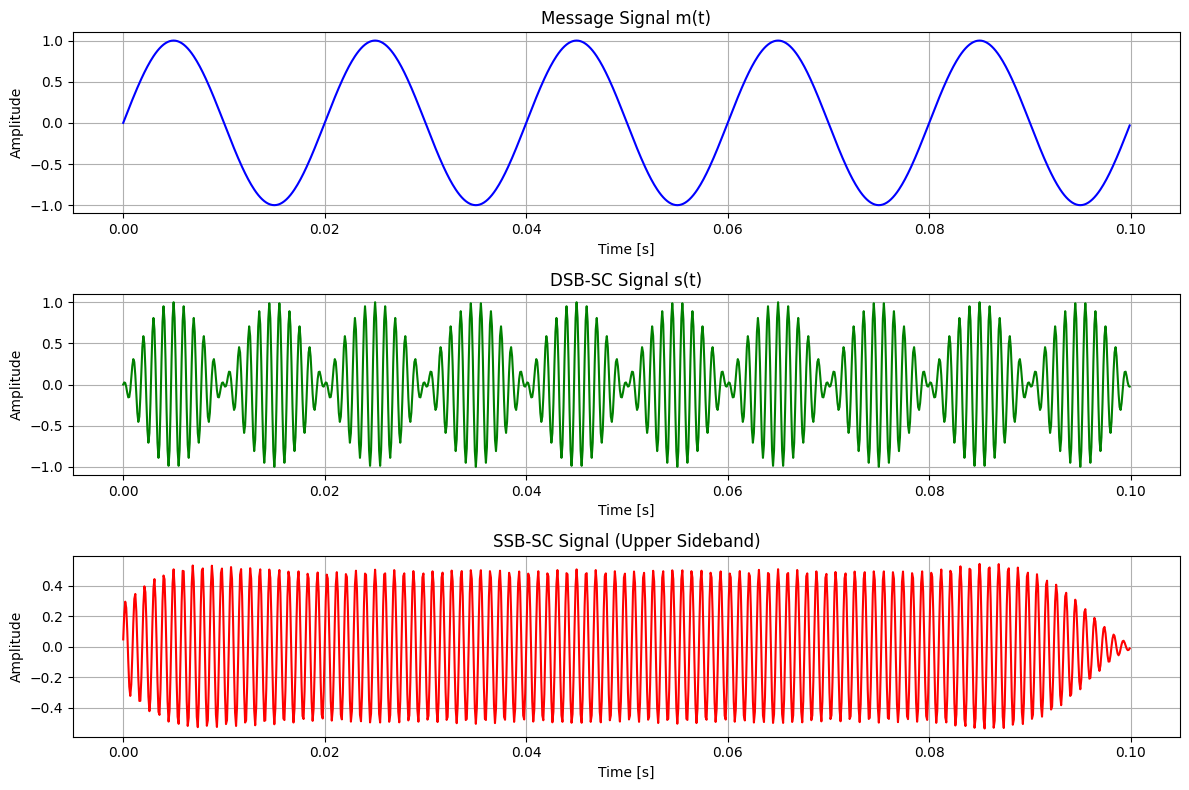

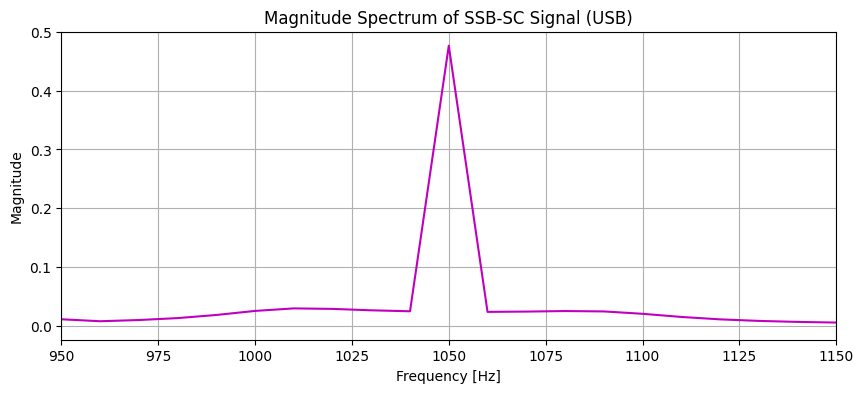

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Sampling parameters
Fs = 10000               # Sampling frequency (Hz)
T = 0.1                  # Duration of signal (seconds)
t = np.arange(0, T, 1/Fs)

# Message signal
Am = 1
fm = 50
m_t = Am * np.sin(2 * np.pi * fm * t)

# Carrier signal
Ac = 1
fc = 1000
c_t = Ac * np.cos(2 * np.pi * fc * t)

# Generate DSB-SC signal
s_dsbsc = m_t * c_t  # Suppressed carrier

# Design band-pass filter to select upper sideband (USB)
lowcut = fc           # Hz
highcut = fc + 2*fm   # Hz

# Butterworth bandpass filter
order = 3
b, a = butter(order, [lowcut/(Fs/2), highcut/(Fs/2)], btype='band')
s_usb = filtfilt(b, a, s_dsbsc)

# Plot time-domain signals
plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot(t, m_t, 'b', linewidth=1.5)
plt.title('Message Signal m(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, s_dsbsc, 'g', linewidth=1.5)
plt.title('DSB-SC Signal s(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, s_usb, 'r', linewidth=1.5)
plt.title('SSB-SC Signal (Upper Sideband)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Frequency-domain analysis
N = len(s_usb)
S_f = np.fft.fft(s_usb)/N
f = np.fft.fftfreq(N, 1/Fs)
f_pos = f[:N//2]
S_f_pos = 2 * np.abs(S_f[:N//2])

plt.figure(figsize=(10,4))
plt.plot(f_pos, S_f_pos, 'm', linewidth=1.5)
plt.title("Magnitude Spectrum of SSB-SC Signal (USB)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(fc-50, fc+2*fm+50)  
plt.show()


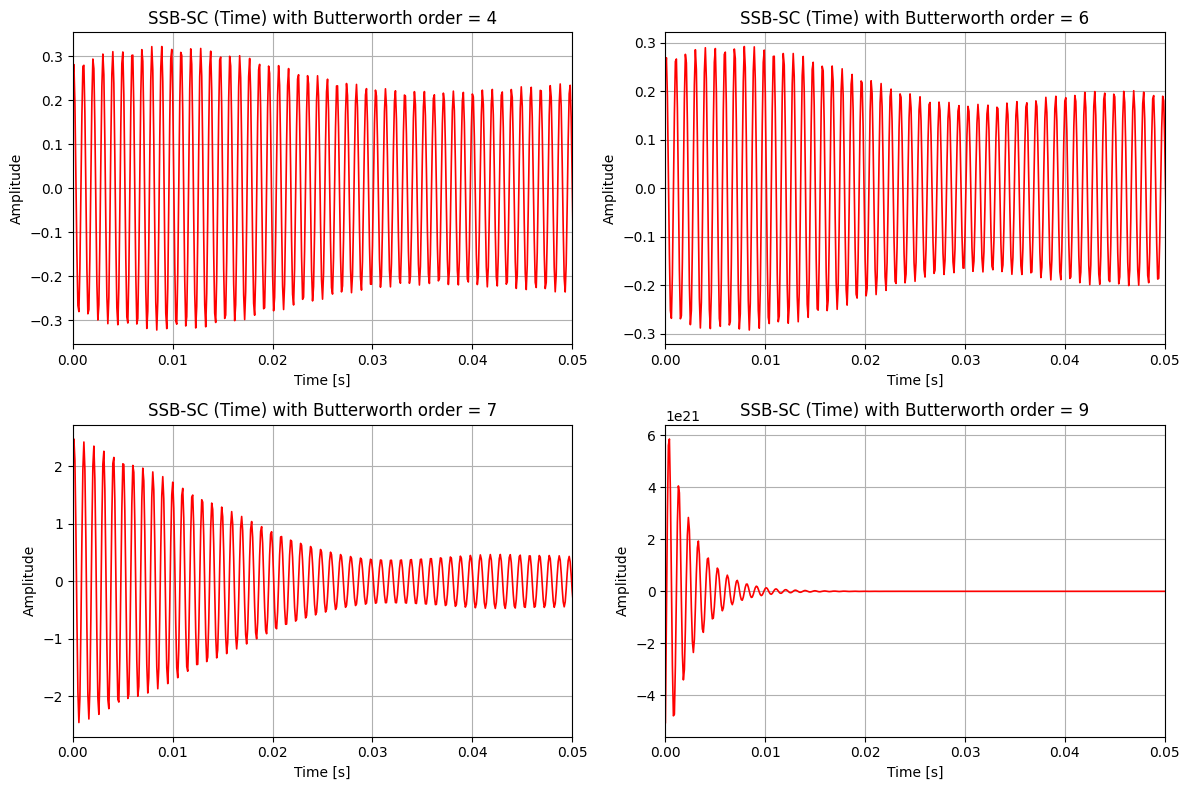

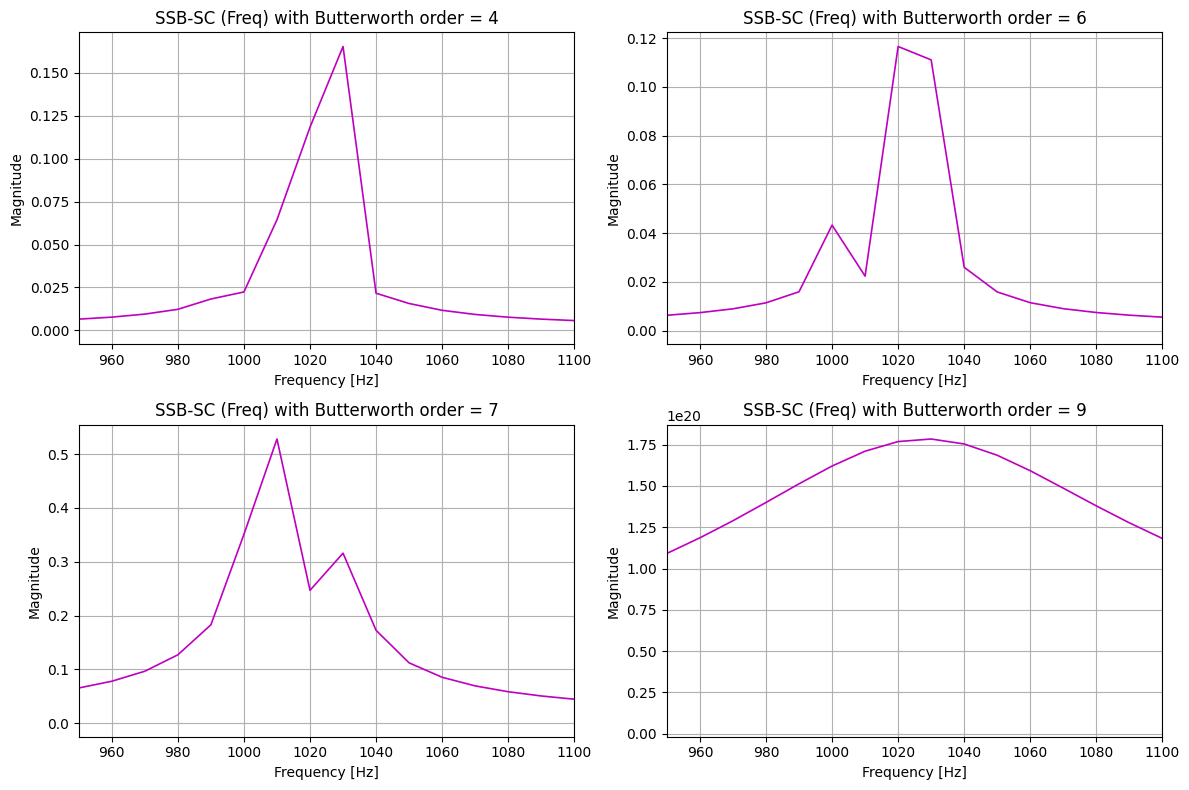

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Sampling parameters
Fs = 10000
T = 0.1
t = np.arange(0, T, 1/Fs)

# Message signal
Am = 1
fm = 30   # message frequency
m_t = Am * np.sin(2 * np.pi * fm * t)

# Carrier
Ac = 1
fc = 1000  # carrier frequency
c_t = Ac * np.cos(2 * np.pi * fc * t)

# Generate DSB-SC signal
s_dsbsc = m_t * c_t

# Narrow band-pass filter to isolate upper sideband
lowcut = fc
highcut = fc + fm  # only upper sideband

orders = [4, 6, 7, 9]

# --- Time-Domain Plots ---
plt.figure(figsize=(12, 8))
for i, order in enumerate(orders):
    b, a = butter(order, [lowcut/(Fs/2), highcut/(Fs/2)], btype='band')
    s_ssb = filtfilt(b, a, s_dsbsc)
    
    plt.subplot(2,2,i+1)
    plt.plot(t, s_ssb, 'r', linewidth=1.2)
    plt.title(f'SSB-SC (Time) with Butterworth order = {order}')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xlim(0, 0.05)  # zoom to see waveform clearly

plt.tight_layout()
plt.show()

# --- Frequency-Domain Plots ---
plt.figure(figsize=(12, 8))
for i, order in enumerate(orders):
    b, a = butter(order, [lowcut/(Fs/2), highcut/(Fs/2)], btype='band')
    s_ssb = filtfilt(b, a, s_dsbsc)
    
    N = len(s_ssb)
    S_f = np.fft.fft(s_ssb)/N
    f = np.fft.fftfreq(N, 1/Fs)
    f_pos = f[:N//2]
    S_f_pos = 2*np.abs(S_f[:N//2])
    
    plt.subplot(2,2,i+1)
    plt.plot(f_pos, S_f_pos, 'm', linewidth=1.2)
    plt.title(f'SSB-SC (Freq) with Butterworth order = {order}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(fc-50, fc+100)  # zoom around upper sideband for clarity

plt.tight_layout()
plt.show()


### SSB SC using Phase Method

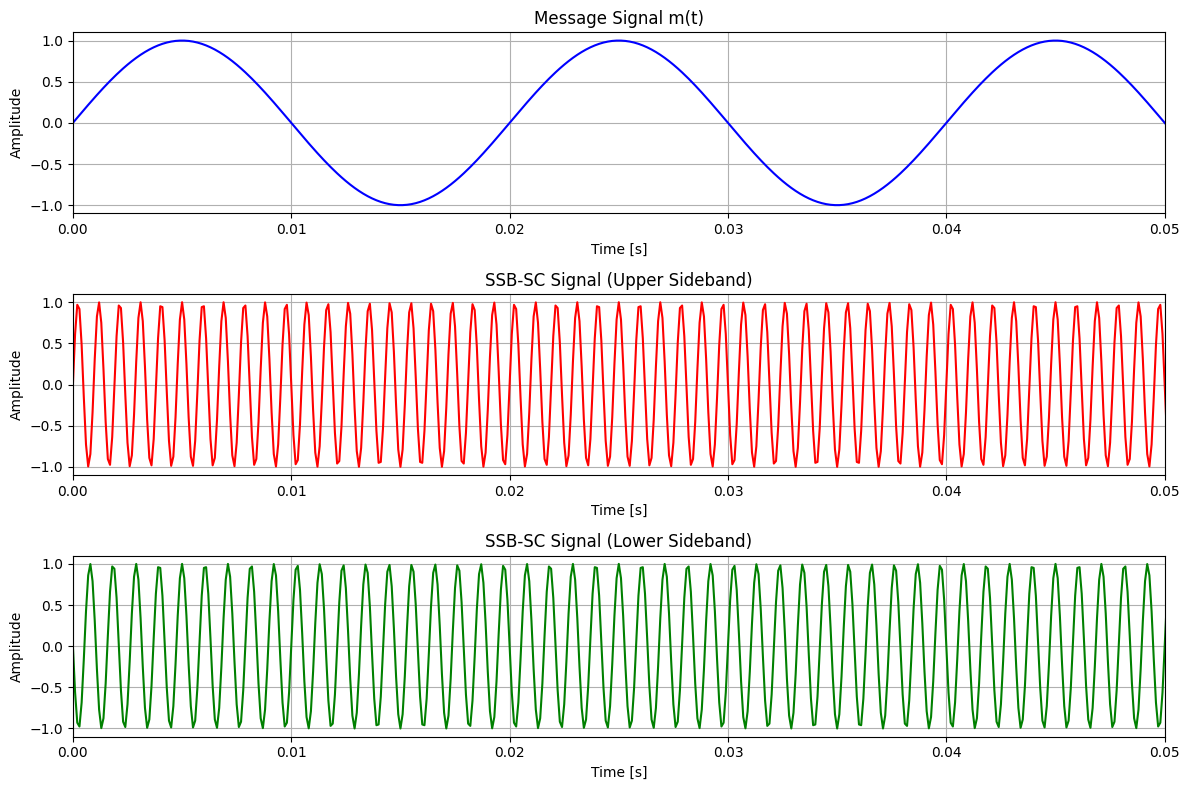

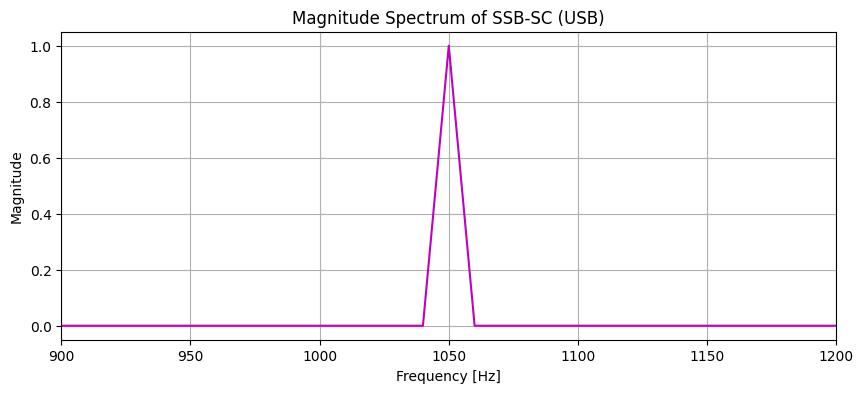

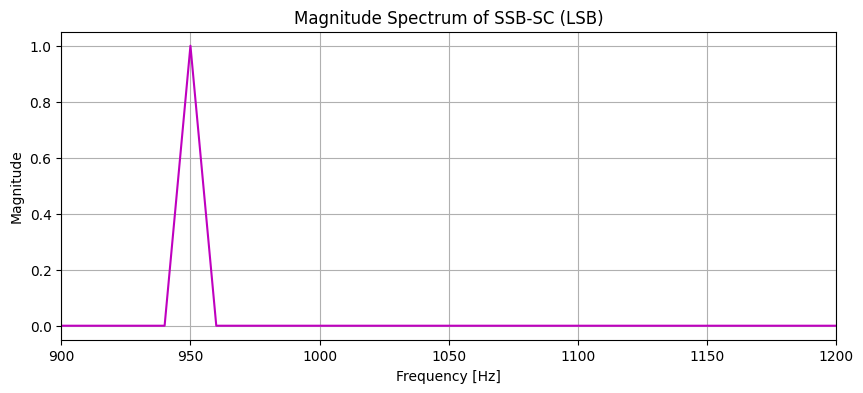

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Sampling Parameters
Fs = 10000                  # Sampling frequency (Hz)
T = 0.1                     # Duration of signal (s)
t = np.arange(0, T, 1/Fs)   # Time vector

# Message Signal (Baseband)
Am = 1                      # Message amplitude
fm = 50                     # Message frequency
m_t = Am * np.sin(2 * np.pi * fm * t)  # Baseband signal

# Carrier Signal
fc = 1000                    # Carrier frequency
c_cos = np.cos(2 * np.pi * fc * t)    # In-phase carrier
c_sin = np.sin(2 * np.pi * fc * t)    # Quadrature carrier (90° phase shift)

# Hilbert Transform of Message
m_hilbert = np.imag(hilbert(m_t))

# Upper Sideband (USB)
s_usb = m_t * c_cos - m_hilbert * c_sin

# Lower Sideband (LSB)
s_lsb = m_t * c_cos + m_hilbert * c_sin

# Time-Domain Plots
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(t, m_t, 'b', linewidth=1.5)
plt.title('Message Signal m(t)')
plt.xlabel('Time [s]')
plt.xlim(0, 0.05)
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, s_usb, 'r', linewidth=1.5)
plt.title('SSB-SC Signal (Upper Sideband)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, s_lsb, 'g', linewidth=1.5)
plt.title('SSB-SC Signal (Lower Sideband)')
plt.xlabel('Time [s]')
plt.xlim(0, 0.05)
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Frequency-Domain Analysis
def plot_spectrum(signal, title, Fs):
    N = len(signal)
    S_f = np.fft.fft(signal)/N
    f = np.fft.fftfreq(N, 1/Fs)
    f_pos = f[:N//2]
    S_f_pos = 2 * np.abs(S_f[:N//2])
    
    plt.figure(figsize=(10,4))
    plt.plot(f_pos, S_f_pos, 'm', linewidth=1.5)
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(fc - 100, fc + 200)  
    plt.show()

# Plot spectra
plot_spectrum(s_usb, 'Magnitude Spectrum of SSB-SC (USB)', Fs)
plot_spectrum(s_lsb, 'Magnitude Spectrum of SSB-SC (LSB)', Fs)
